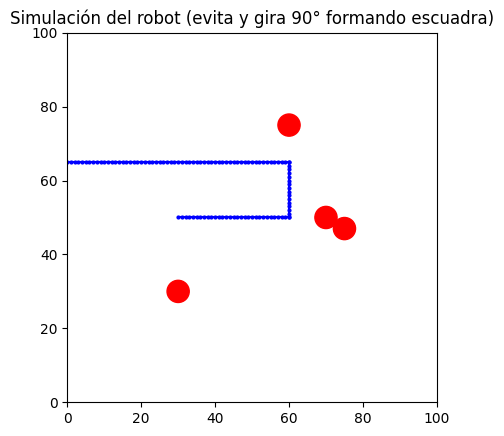

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

# -------------------------------
# Configuración del entorno
# -------------------------------
ANCHO, ALTO = 100, 100  # espacio 2D
NUM_OBSTACULOS = 4
RADIO_SENSORES = 16

# Obstáculos (al menos uno fijo a media distancia)
obstaculos = [(70, 50)]  # obstáculo inicial fijo, ni tan cerca ni tan lejos
for _ in range(NUM_OBSTACULOS - 1):
    ox = random.randint(20, ANCHO-20)
    oy = random.randint(20, ALTO-20)
    obstaculos.append((ox, oy))

# -------------------------------
# Robot
# -------------------------------
class Robot:
    def __init__(self, x, y, angulo=0):
        self.x = x
        self.y = y
        self.angulo = angulo  # grados

    def detectar(self, direccion):
        """Simula el sensor en una dirección específica, devuelve estado 0/1/2"""
        ang = math.radians(self.angulo + direccion)
        for dist in range(1, RADIO_SENSORES + 1):
            sx = self.x + dist * math.cos(ang)
            sy = self.y + dist * math.sin(ang)
            for ox, oy in obstaculos:
                if math.dist((sx, sy), (ox, oy)) < 3:  # radio obstáculo ~3
                    if dist <= 8:
                        return 0
                    elif dist <= 16:
                        return 1
        return 2

    def sensores(self):
        return [self.detectar(-45), self.detectar(0), self.detectar(45)]

    def paso(self):
        I, C, D = self.sensores()

        # Reglas: si hay obstáculo cerca, gira 90°
        if C == 0 or I == 0 or D == 0:
            self.angulo += 90  # forma una escuadra
        else:
            # avanza hacia adelante
            self.x += math.cos(math.radians(self.angulo))
            self.y += math.sin(math.radians(self.angulo))

# -------------------------------
# Simulación
# -------------------------------
robot = Robot(30, 50)
trayectoria = [(robot.x, robot.y)]

for _ in range(300):
    robot.paso()
    trayectoria.append((robot.x, robot.y))

# -------------------------------
# Visualización
# -------------------------------
fig, ax = plt.subplots()

# Obstáculos
for ox, oy in obstaculos:
    ax.add_patch(patches.Circle((ox, oy), 3, color='red'))

# Trayectoria
xs, ys = zip(*trayectoria)
ax.plot(xs, ys, '-o', markersize=2, color='blue')

ax.set_xlim(0, ANCHO)
ax.set_ylim(0, ALTO)
ax.set_aspect('equal')
plt.title("Simulación del robot (evita y gira 90° formando escuadra)")
plt.show()
